In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error, r2_score

from acquire import get_store_sales_data
from prepare import prepare_data

# Time Series Modeling Exercises

## Saas.csv

In [4]:
saas = pd.read_csv('https://ds.codeup.com/saas.csv')
saas.shape

(790458, 5)

In [5]:
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


### 1

Split data (train/validate/test) and resample by any period, except daily, and aggregate using the sum.

In [7]:
# Let's do a little bit of prep first.
saas.columns = [column.lower() for column in saas.columns]
saas.head(1)

,month_invoiced,customer_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0


In [10]:
saas.month_invoiced = pd.to_datetime(saas.month_invoiced, format = '%Y-%m-%d')
saas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   month_invoiced     790458 non-null  datetime64[ns]
 1   customer_id        790458 non-null  int64         
 2   invoice_id         790458 non-null  int64         
 3   subscription_type  790458 non-null  float64       
 4   amount             790458 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 30.2 MB


In [11]:
saas = saas.set_index('month_invoiced').sort_index()
saas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 790458 entries, 2014-01-31 to 2017-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        790458 non-null  int64  
 1   invoice_id         790458 non-null  int64  
 2   subscription_type  790458 non-null  float64
 3   amount             790458 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 30.2 MB


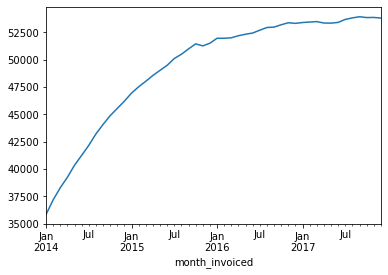

In [14]:
saas.groupby(saas.index).amount.sum().plot();

In [28]:
saas.index.unique()

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='month_invoiced', freq=None)

In [26]:
# Now we can split the data. We'll use human based splitting.
train = saas.loc[ : '2015-12-31']
validate = saas['2016-01-31' : '2016-12-31']
test = saas['2017-01-31' : ]

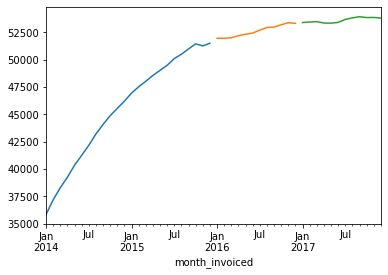

In [30]:
train.resample('M').amount.sum().plot()
validate.resample('M').amount.sum().plot()
test.resample('M').amount.sum().plot();

### 2

Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

- Simple Average

- Moving Average
- Holt's Linear Trend Model
- Based on previous year/month/etc., this is up to you.

## Optional: Using store item demand

In [3]:
store_sales = prepare_data(get_store_sales_data())
store_sales.shape

Reading from .csv file.
Reading from .csv file.
Reading from .csv file.


(913000, 16)

### 1

Predict 2018 total monthly sales for a single store and/or item by creating a model.

### 2

Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).

### 3

Plot the 2018 monthly sales predictions.